<a href="https://colab.research.google.com/github/Walidcorloene/VenteDeMaillot/blob/main/SellPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [ ]:
os.chdir('drive/My Drive/computer science/Ressource journée 3')

In [ ]:
ls data

vente_maillots_de_bain.xlsx


# Loading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('./data/vente_maillots_de_bain.xlsx',sheet_name='Sheet2')
df.head(10)

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9
5,2001-06-01,228.6
6,2001-07-01,215.9
7,2001-08-01,190.5
8,2001-09-01,177.8
9,2001-10-01,139.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   108 non-null    datetime64[ns]
 1   Sales   108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


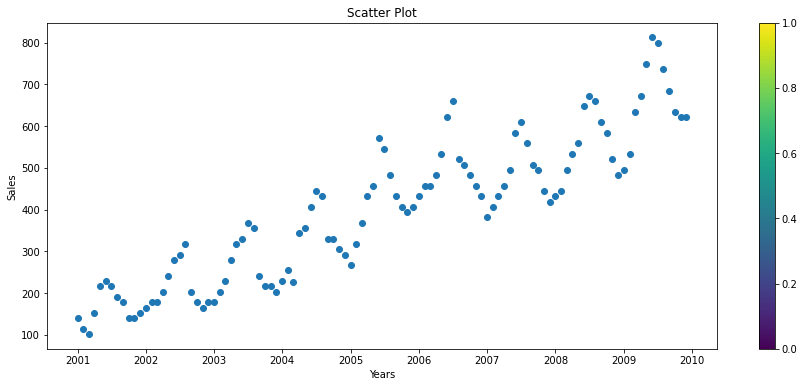

In [ ]:
#the size of your frame
plt.figure(figsize=(15,6))
#ordonate your data in different axes
plt.scatter(df['Years'], df['Sales'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Years')
plt.ylabel('Sales')
  
plt.colorbar()
  
plt.show()

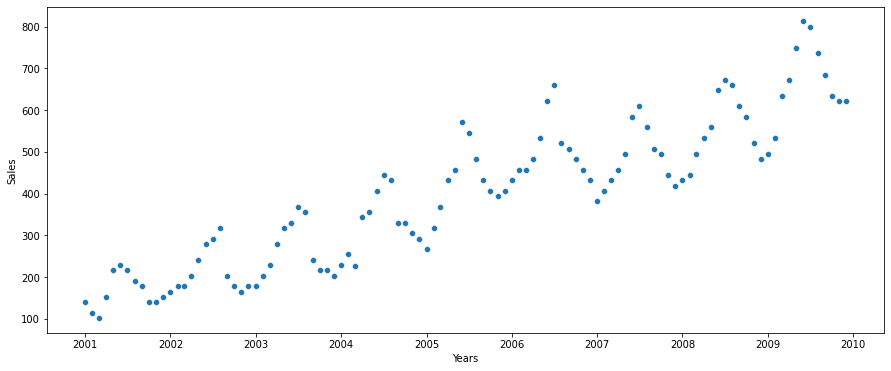

In [ ]:
plt.figure(figsize=(15,6))
#Seaborn scatterplot(les x et y et declarer les données)
sns.scatterplot(x="Years", y="Sales", data=df)

plt.show()

In [ ]:
#rajouter une colomn 
df["time"] = np.arange(1, 109, 1)
df.head(10)

,Years,Sales,time
0,2001-01-01,139.7,1
1,2001-02-01,114.3,2
2,2001-03-01,101.6,3
3,2001-04-01,152.4,4
4,2001-05-01,215.9,5
5,2001-06-01,228.6,6
6,2001-07-01,215.9,7
7,2001-08-01,190.5,8
8,2001-09-01,177.8,9
9,2001-10-01,139.7,10


In [ ]:
#pour découper et entrainer 70% des données (split) 
df_train = df.loc[:81]
#pour testé avec les 30% restante tout en découpant
df_test= df.loc[82:]

In [ ]:
df_train.tail(10)

,Years,Sales,time
72,2007-01-01,381.0,73
73,2007-02-01,406.4,74
74,2007-03-01,431.8,75
75,2007-04-01,457.2,76
76,2007-05-01,495.3,77
77,2007-06-01,584.2,78
78,2007-07-01,609.6,79
79,2007-08-01,558.8,80
80,2007-09-01,508.0,81
81,2007-10-01,495.3,82


In [ ]:
df_test.head(10)

,Years,Sales,time
82,2007-11-01,444.5,83
83,2007-12-01,419.1,84
84,2008-01-01,431.8,85
85,2008-02-01,444.5,86
86,2008-03-01,495.3,87
87,2008-04-01,533.4,88
88,2008-05-01,558.8,89
89,2008-06-01,647.7,90
90,2008-07-01,673.1,91
91,2008-08-01,660.4,92


In [ ]:
#double crochet pour selectionner la colonne visé une seul colonne pour avoir la valeur de toute la ligne
x_train = df_train[["time"]].values
#initialisé les valeur dans l'ordres de chaque axe
x_test = df_test[["time"]].values
#utilisation de sklearn pour créer un modèle regressif
y_train = df_train[["Sales"]].values
y_test = df_test[["Sales"]].values


In [ ]:
#bibliothèque du modèle regressif
from sklearn.linear_model import LinearRegression

In [ ]:
#stocker le modèle dans model_trend
model_trend = LinearRegression()

In [ ]:
model_trend.fit(x_train, y_train)

LinearRegression()

In [ ]:
#fitted pour les valeur entrainé
#pour evaluer x et avoir les valeur de y
y_fitted_values = model_trend.predict(x_train)
y_predicted_values = model_trend.predict(x_test) 

pour claculer l'interval de confiance il faut #
- calculer l'erreur 
- calculer l'ecart type de l'erreur
- choisir quel interval de confiance souhaité

In [ ]:
error = y_train - y_fitted_values #calcul de l'erreur
ecart_error = error.std() #calcul de l'ecart type de l'erreur 
interval = 4.4 * ecart_error

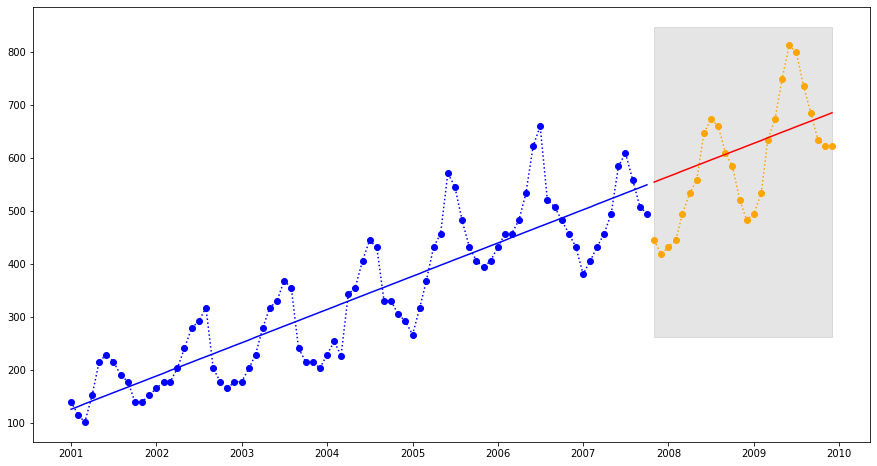

In [ ]:
plt.figure(figsize=(15,8))
#base d'entrainement
plt.plot(df_train["Years"],y_train, "bo:") #b --> blue, o: pour rattacher chaque point avec les points
plt.plot(df_train["Years"], y_fitted_values, "b")

#test base
plt.plot(df_test["Years"],y_test, "o:", color = "orange") 
plt.plot(df_test["Years"], y_predicted_values, color = "red")

marge_min = y_predicted_values - interval
marge_max = y_predicted_values + interval
plt.fill_between(df_test["Years"], (marge_max[0]), (marge_min[0]), alpha = 0.1 , color="black")
#plt.legend
plt.show()


In [ ]:
df.head()   

,Years,Sales,time
0,2001-01-01,139.7,1
1,2001-02-01,114.3,2
2,2001-03-01,101.6,3
3,2001-04-01,152.4,4
4,2001-05-01,215.9,5


In [ ]:
df_train1 = df_train.copy()
df_test1 = df_test.copy()

In [ ]:
df_train1["month"] = df_train1["Years"].dt.month_name()
df_test1["month"] = df_test1["Years"].dt.month_name()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


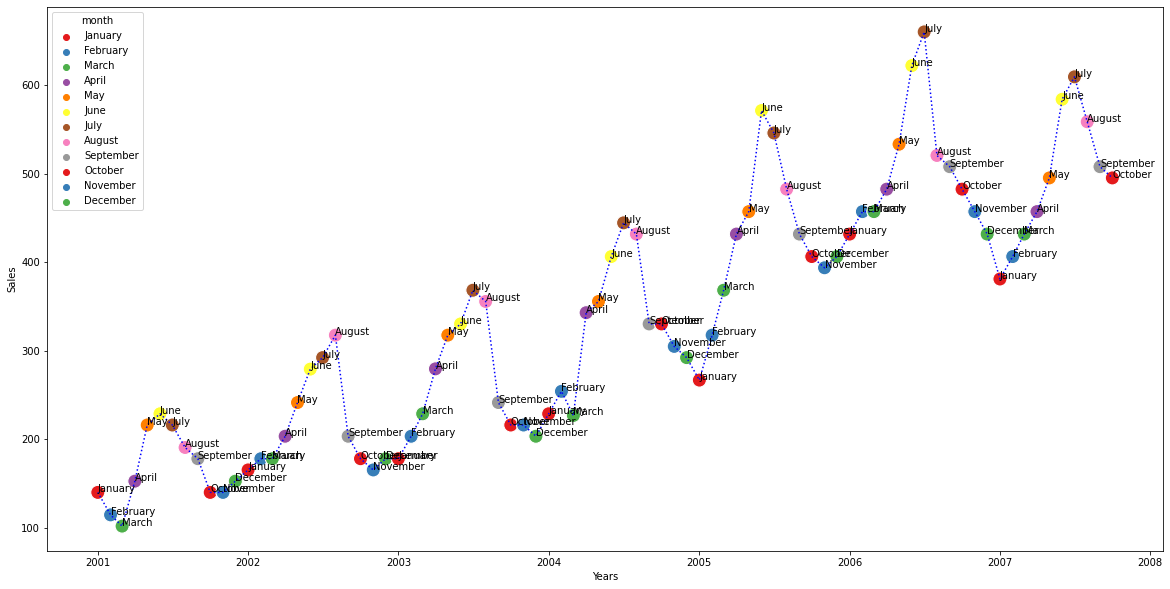

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_train1["Years"], df_train1["Sales"],"b:")
sns.scatterplot("Years", "Sales", data = df_train1, s=200, hue="month", palette="Set1")
for index_line in range(len(df_train1)):
  plt.text(df_train1["Years"][index_line], df_train1["Sales"][index_line],df_train1["month"][index_line])

In [ ]:
month= ["January","February","March","April","May","June","July","August","September","October","November","December"]
month

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [ ]:
def month_num(x):
for i in len(df_enc):
  if df_enc[df_enc["time" == i]]:
  df["month_name"] = month 


In [ ]:
dum_train = pd.get_dummies(df_train1["month"])
df_train1 = pd.concat((df_train1, dum_train), axis = 1)

In [ ]:
df_train1.head(20)

,Years,Sales,time,month,April,August,December,February,January,July,June,March,May,November,October,September
0,2001-01-01,139.7,1,January,0,0,0,0,1,0,0,0,0,0,0,0
1,2001-02-01,114.3,2,February,0,0,0,1,0,0,0,0,0,0,0,0
2,2001-03-01,101.6,3,March,0,0,0,0,0,0,0,1,0,0,0,0
3,2001-04-01,152.4,4,April,1,0,0,0,0,0,0,0,0,0,0,0
4,2001-05-01,215.9,5,May,0,0,0,0,0,0,0,0,1,0,0,0
5,2001-06-01,228.6,6,June,0,0,0,0,0,0,1,0,0,0,0,0
6,2001-07-01,215.9,7,July,0,0,0,0,0,1,0,0,0,0,0,0
7,2001-08-01,190.5,8,August,0,1,0,0,0,0,0,0,0,0,0,0
8,2001-09-01,177.8,9,September,0,0,0,0,0,0,0,0,0,0,0,1
9,2001-10-01,139.7,10,October,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
dum_test= pd.get_dummies(df_test1["month"])
df_test1 = pd.concat((df_test1, dum_test), axis = 1)

In [ ]:
df_test1

,Years,Sales,time,month,April,August,December,February,January,July,June,March,May,November,October,September
82,2007-11-01,444.5,83,November,0,0,0,0,0,0,0,0,0,1,0,0
83,2007-12-01,419.1,84,December,0,0,1,0,0,0,0,0,0,0,0,0
84,2008-01-01,431.8,85,January,0,0,0,0,1,0,0,0,0,0,0,0
85,2008-02-01,444.5,86,February,0,0,0,1,0,0,0,0,0,0,0,0
86,2008-03-01,495.3,87,March,0,0,0,0,0,0,0,1,0,0,0,0
87,2008-04-01,533.4,88,April,1,0,0,0,0,0,0,0,0,0,0,0
88,2008-05-01,558.8,89,May,0,0,0,0,0,0,0,0,1,0,0,0
89,2008-06-01,647.7,90,June,0,0,0,0,0,0,1,0,0,0,0,0
90,2008-07-01,673.1,91,July,0,0,0,0,0,1,0,0,0,0,0,0
91,2008-08-01,660.4,92,August,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
columns_for_regression = ["January","February","March","April","May","June","July","August","September","October","November","December", "time"]
x_train_add = df_train1[columns_for_regression].values
y_train_add = df_train1["Sales"].values

x_test_add = df_test1[columns_for_regression].values
y_test_add = df_test1["Sales"].values

In [ ]:
x_train_add

array([[ 1,  0,  0, ...,  0,  0,  1],
       [ 0,  1,  0, ...,  0,  0,  2],
       [ 0,  0,  1, ...,  0,  0,  3],
       ...,
       [ 0,  0,  0, ...,  0,  0, 80],
       [ 0,  0,  0, ...,  0,  0, 81],
       [ 0,  0,  0, ...,  0,  0, 82]])

In [ ]:
x_test_add

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  83],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  84],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,  88],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,  89],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,  90],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,  91],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  92],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,  93],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  94],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  95],
       [  0,   0,   0,   0,   0,   0, 



## Régression Linéaire(modèle additif





In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_add = LinearRegression()

In [ ]:
model_add.fit(x_train_add, y_train_add)

LinearRegression()

In [ ]:
y_fitted_values_add = model_add.predict(x_train_add)
y_predicted_values_add = model_add.predict(x_test_add)

In [ ]:
error1 = y_train - y_fitted_values_add #calcul de l'erreur
ecart_error1 = error1.std() #calcul de l'ecart type de l'erreur 
interval = 4.4 * ecart_error1

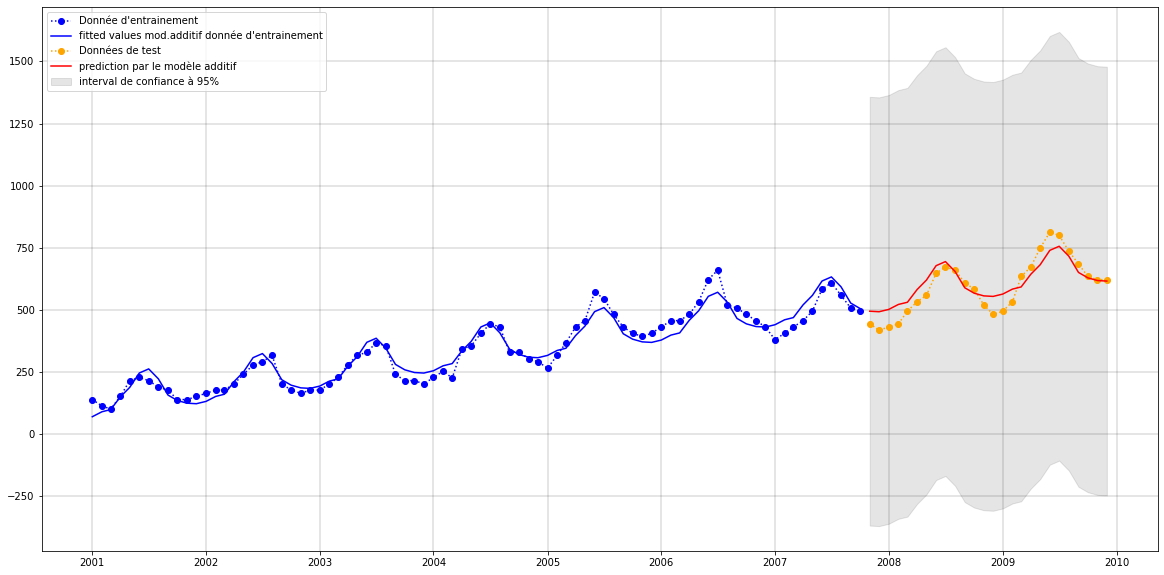

In [ ]:
plt.figure(figsize=(20,10))
#train base 
plt.plot(df_train1["Years"],y_train_add, "bo:") #b --> blue, o: pour rattacher chaque point avec les points
plt.plot(df_train1["Years"], y_fitted_values_add, "b")

#test base
plt.plot(df_test1["Years"],y_test_add, "o:", color = "orange") 
plt.plot(df_test1["Years"], y_predicted_values_add, color = "red")

marge_min = y_predicted_values_add - interval
marge_max = y_predicted_values_add + interval
plt.fill_between(df_test1["Years"], marge_max, marge_min, alpha = 0.1 , color="black")


# for index_line in range(len(df_train1)):
#   plt.text(df_train1["Years"][index_line], df_train1["Sales"][index_line],df_train1["month"][index_line])
plt.grid(lw= 0.2, color="black")
plt.legend(["Donnée d'entrainement","fitted values mod.additif donnée d'entrainement",
            "Données de test", "prediction par le modèle additif", "interval de confiance à 95%"], loc=2)
plt.show()

-Regression linéaire :

x = temps,

y = tendance des ventes 


---


-Modèle additif ( reg linéaire multiple )

x = temps + one hot encoding des dumies 

y = prediction du modèle additif


---


-Modèle multiplicatif:

étape 1 : régression linéaire simple donne la tendance.

étape 2 : facteur correctif (facteur saisonier) = vérité térrain(y) / tendance 





# Modèle multiplicatif




# Regression linéaire simple

In [ ]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [ ]:
x_train2_mul = df_train1[["time"]].values
y_train2_mul = df_train1[["Sales"]].values

x_test2_mul = df_test1[["time"]].values
y_test2_mul = df_test1[["Sales"]].values

In [ ]:
model_trend_mul = LinearRegression()

In [ ]:
df_train2["month"] = df_train2["Years"].dt.month_name()
df_test2["month"] = df_test2["Years"].dt.month_name()

In [ ]:
#entrainement
model_trend_mul.fit(x_train2_mul, y_train2_mul)

LinearRegression()

In [ ]:
#calcule la valeur de la  tendance de la base d'entrainement
y_fitted_values2 = model_trend_mul.predict(x_train2_mul)

In [ ]:
df_train2["trend_prediction"] = y_fitted_values2 

In [ ]:
#division des valeurs de 2 colonne et mettre le resultats dans une autre colonn
df_train2["trend_deviation"] = df_train2["Sales"] / df_train2["trend_prediction"]

In [ ]:
#affichage de colonne selectionner
df_train2[["month", "trend_deviation"]].head(50)

,month,trend_deviation
0,January,1.111166
1,February,0.872816
2,March,0.746032
3,April,1.077650
4,May,1.472208
5,June,1.505114
6,July,1.374162
7,August,1.173423
8,September,1.061003
9,October,0.808407


In [ ]:
correction_factor = df_train2[["month","trend_deviation"]].groupby("month").mean().rename(columns={"trend_deviation": "correction_factor"})

# étape 4 : ajout de la colonne du facteur de correction

In [ ]:
correction_factor

,correction_factor
month,
April,1.028787
August,1.192485
December,0.800370
February,0.862502
January,0.838674
July,1.310564
June,1.292764
March,0.860030
May,1.158041


In [ ]:
df_train2 = df_train2.merge(correction_factor, on ="month")

In [ ]:
df_train2.head(50)

,Years,Sales,time,month,trend_prediction,trend_deviation,correction_factor
0,2001-01-01,139.7,1,January,125.723744,1.111166,0.838674
1,2002-01-01,165.1,13,January,188.504062,0.875843,0.838674
2,2003-01-01,177.8,25,January,251.284380,0.707565,0.838674
3,2004-01-01,228.6,37,January,314.064698,0.727876,0.838674
4,2005-01-01,266.7,49,January,376.845016,0.707718,0.838674
5,2006-01-01,431.8,61,January,439.625334,0.982200,0.838674
6,2007-01-01,381.0,73,January,502.405652,0.758351,0.838674
7,2001-02-01,114.3,2,February,130.955437,0.872816,0.862502
8,2002-02-01,177.8,14,February,193.735755,0.917745,0.862502
9,2003-02-01,203.2,26,February,256.516073,0.792153,0.862502




```
# Utilisation du moèle multiplicatif
```



In [ ]:
df_train2["multiplicatif_model_prediction"] = df_train2["trend_prediction"] * df_train2["correction_factor"]

In [ ]:
newcol = ["month","Years", "Sales", "time","trend_prediction","trend_deviation","correction_factor","multiplicatif_model_prediction"]
df_train2 = df_train2[newcol]

In [ ]:
df_train2

,month,Years,Sales,time,trend_prediction,trend_deviation,correction_factor,multiplicatif_model_prediction
0,January,2001-01-01,139.7,1,125.723744,1.111166,0.838674,105.441259
1,January,2002-01-01,165.1,13,188.504062,0.875843,0.838674,158.093491
2,January,2003-01-01,177.8,25,251.284380,0.707565,0.838674,210.745723
3,January,2004-01-01,228.6,37,314.064698,0.727876,0.838674,263.397955
4,January,2005-01-01,266.7,49,376.845016,0.707718,0.838674,316.050187
...,...,...,...,...,...,...,...,...
77,December,2002-12-01,177.8,24,246.052687,0.722609,0.800370,196.933083
78,December,2003-12-01,203.2,36,308.833005,0.657961,0.800370,247.180540
79,December,2004-12-01,292.1,48,371.613323,0.786032,0.800370,297.427996
80,December,2005-12-01,406.4,60,434.393641,0.935557,0.800370,347.675452


In [ ]:
df_test2["trend_prediction"] = model_trend_mul.predict(x_test2_mul)

In [ ]:
df_test2 = df_test2.merge(correction_factor, on = "month")

In [ ]:
df_test2["multiplicatif_model_prediction"] = df_test2["trend_prediction"] * df_test2["correction_factor"]

In [ ]:
df_test2

,Years,Sales,time,month,trend_prediction,correction_factor,multiplicatif_model_prediction
0,2007-11-01,444.5,83,November,554.722584,0.810003,449.327116
1,2008-11-01,520.7,95,November,617.502902,0.810003,500.179379
2,2009-11-01,622.3,107,November,680.283220,0.810003,551.031643
3,2007-12-01,419.1,84,December,559.954277,0.800370,448.170365
4,2008-12-01,482.6,96,December,622.734595,0.800370,498.417821
5,2009-12-01,622.3,108,December,685.514913,0.800370,548.665277
6,2008-01-01,431.8,85,January,565.185970,0.838674,474.006884
7,2009-01-01,495.3,97,January,627.966288,0.838674,526.659116
8,2008-02-01,444.5,86,February,570.417663,0.862502,491.986499
9,2009-02-01,533.4,98,February,633.197981,0.862502,546.134663


In [ ]:
df_test2.sort_values(by="Years", inplace=True, ignore_index=True)
df_train2.sort_values(by="Years", inplace=True, ignore_index=True)

In [ ]:
df_test2

,Years,Sales,time,month,trend_prediction,correction_factor,multiplicatif_model_prediction
0,2007-11-01,444.5,83,November,554.722584,0.810003,449.327116
1,2007-12-01,419.1,84,December,559.954277,0.800370,448.170365
2,2008-01-01,431.8,85,January,565.185970,0.838674,474.006884
3,2008-02-01,444.5,86,February,570.417663,0.862502,491.986499
4,2008-03-01,495.3,87,March,575.649356,0.860030,495.075746
5,2008-04-01,533.4,88,April,580.881049,1.028787,597.602891
6,2008-05-01,558.8,89,May,586.112743,1.158041,678.742347
7,2008-06-01,647.7,90,June,591.344436,1.292764,764.468731
8,2008-07-01,673.1,91,July,596.576129,1.310564,781.850986
9,2008-08-01,660.4,92,August,601.807822,1.192485,717.646632


In [ ]:
error_mul= df_test2["Sales"] - df_test2["multiplicatif_model_prediction"]
std_error_mul = error_mul.std()
interval_mul = 4.4 * std_error_mul

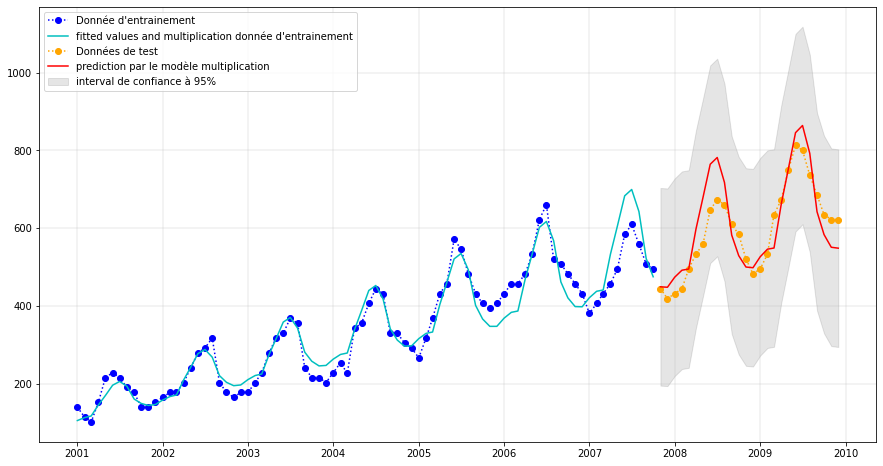

In [ ]:
plt.figure(figsize=(15, 8))
#affichage de la base d'entrainement
plt.plot(df_train2["Years"], df_train2["Sales"], "o:", color = "blue")
plt.plot(df_train2["Years"], df_train2["multiplicatif_model_prediction"], color="c")

#affichage des données de la base de test
plt.plot(df_test2["Years"], df_test2["Sales"], "o:", color="orange")
plt.plot(df_test2["Years"], df_test2["multiplicatif_model_prediction"], color="red")

marge_max_mul = df_test2["multiplicatif_model_prediction"] + interval_mul
marge_min_mul = df_test2["multiplicatif_model_prediction"] - interval_mul
plt.fill_between(df_test2["Years"], marge_max_mul, marge_min_mul, alpha = 0.1, color="black")

#pour milimétré le graphe
plt.grid(lw = 0.3)

#pour détailler les données
plt.legend(["Donnée d'entrainement","fitted values and multiplication donnée d'entrainement",
            "Données de test", "prediction par le modèle multiplication", "interval de confiance à 95%"], loc=2)
plt.show()




# Autocorrélation + stationnarisation




In [ ]:
df_train3 = df_train.copy()
df_test3 = df_test.copy()

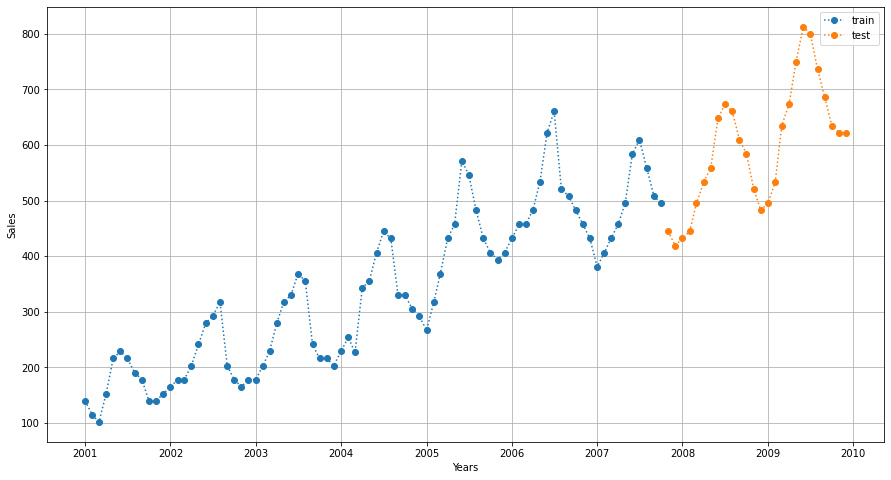

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df_train3["Years"], df_train3["Sales"],"o:")
plt.plot(df_test3["Years"], df_test3["Sales"], "o:")
plt.legend(["train","test"])
plt.ylabel("Sales")
plt.xlabel("Years")
plt.grid()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 0, 'Lags')

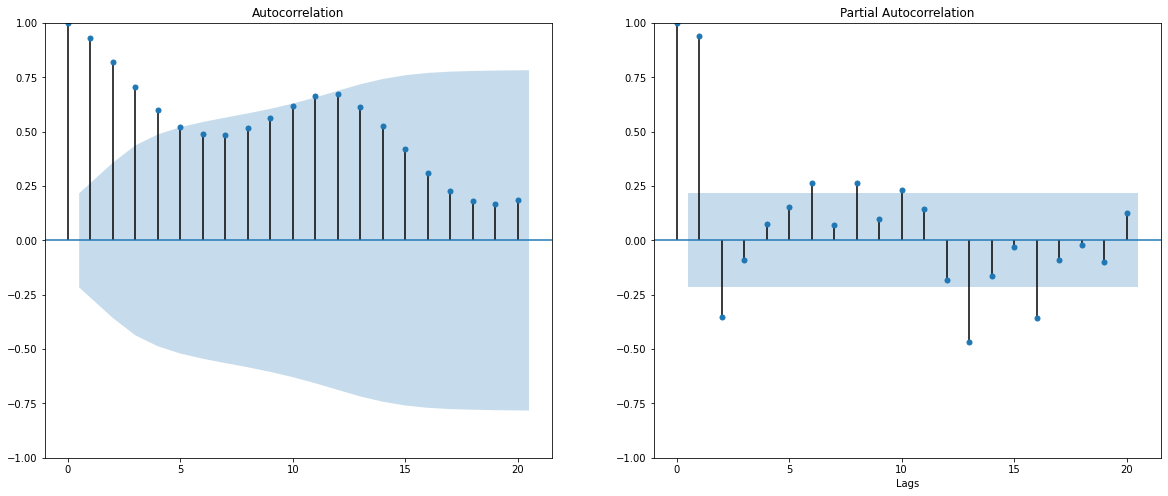

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,8))
autocor = plot_acf(df_train3["Sales"], ax = ax[0])
plt.xlabel("Lags")
partial_autocor = plot_pacf(df_train3["Sales"], ax = ax[1])
plt.xlabel("Lags")

In [ ]:
difference = df_train3["Sales"].diff()

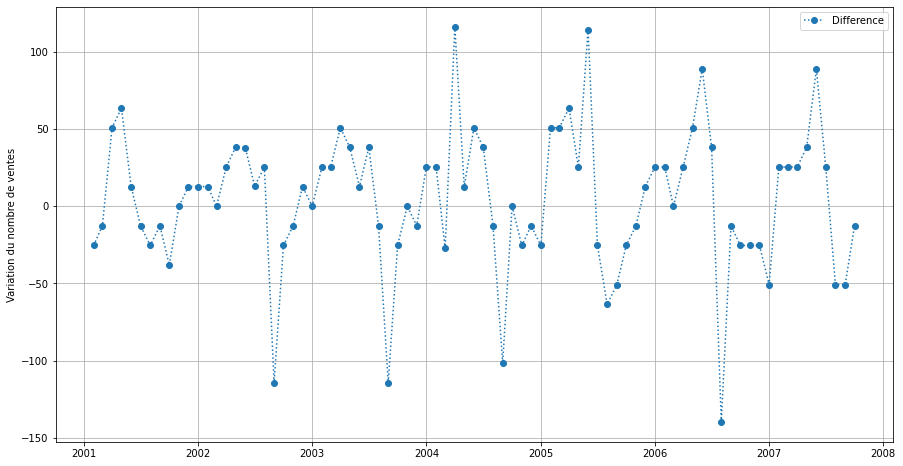

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df_train3["Years"], difference, "o:")
plt.legend(["Difference"])
plt.ylabel("Variation du nombre de ventes")
plt.grid()
plt.show()

In [ ]:
difference.dropna(inplace= True)

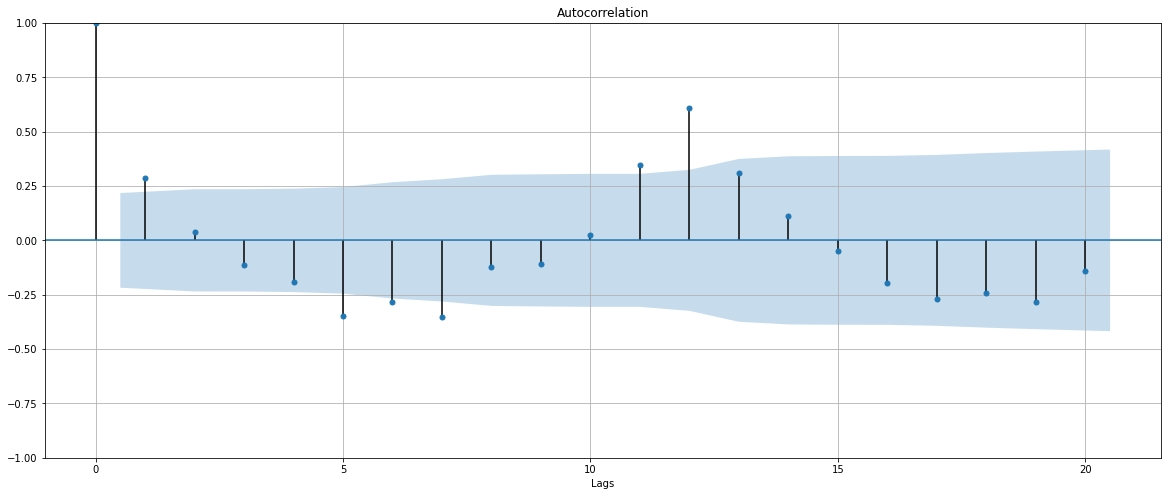

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))
autocor= plot_acf(difference, ax = ax)
plt.xlabel("Lags")
# partial_autocor = plot_pacf(difference, ax = ax[1])
# plt.xlabel("Lags")
plt.grid()
fig.show()




## Auto regressif
on le note AR(p)

avec p = number of lags (taille du cycle) 

Dans notre exemple : p= 12( mois)

le modèle que l'on va construire est AR(12)

Sa prédiction pour un instant t dépend des 12 valeurs précédentes



In [ ]:
x_train= df_train3.set_index("Years")
x_test = df_test3.set_index("Years")

In [ ]:
x_train.drop(columns=["time"], inplace=True)
x_test.drop(columns=["time"], inplace = True)

In [ ]:
x_train

,Sales
Years,
2001-01-01,139.7
2001-02-01,114.3
2001-03-01,101.6
2001-04-01,152.4
2001-05-01,215.9
...,...
2007-06-01,584.2
2007-07-01,609.6
2007-08-01,558.8


In [ ]:
!pip install --upgrade statsmodels

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
model_ar = AutoReg(x_train, lags=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
fitted_values_ar = model_ar.fittedvalues

In [ ]:
fitted_values_ar

Years
2002-01-01    173.600317
2002-02-01    167.060551
2002-03-01    195.418069
2002-04-01    214.243440
2002-05-01    251.696974
                 ...    
2007-06-01    596.183886
2007-07-01    604.711100
2007-08-01    600.807264
2007-09-01    536.580615
2007-10-01    504.878431
Length: 70, dtype: float64

<function matplotlib.pyplot.show>

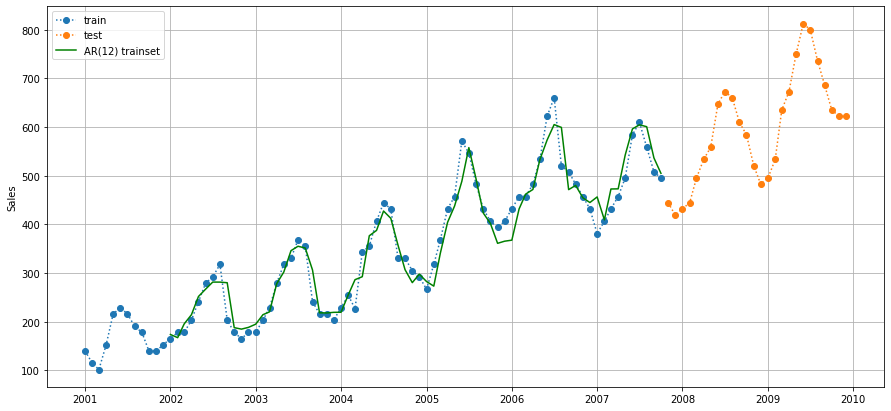

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_train3["Years"],df_train3["Sales"],"o:")
plt.plot(df_test3["Years"],df_test3["Sales"],"o:")
plt.plot(fitted_values_ar,"g-")
plt.legend(["train","test","AR(12) trainset"])
plt.ylabel("Sales")
plt.grid()
plt.show

In [ ]:
df_test3.head()

,Years,Sales,time
82,2007-11-01,444.5,83
83,2007-12-01,419.1,84
84,2008-01-01,431.8,85
85,2008-02-01,444.5,86
86,2008-03-01,495.3,87


In [ ]:
df_test3.tail()

,Years,Sales,time
103,2009-08-01,736.6,104
104,2009-09-01,685.5,105
105,2009-10-01,635.0,106
106,2009-11-01,622.3,107
107,2009-12-01,622.3,108


In [ ]:
import datetime

In [ ]:
start = datetime.datetime.strptime("2007-11-01","%Y-%m-%d")
end = datetime.datetime.strptime("2009-12-01","%Y-%m-%d")

In [ ]:
prediction_test = model_ar.predict(start,end)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [ ]:
error = model_ar.resid
std_error = error.std()
interval_ar = 4.4 * std_error

<function matplotlib.pyplot.show>

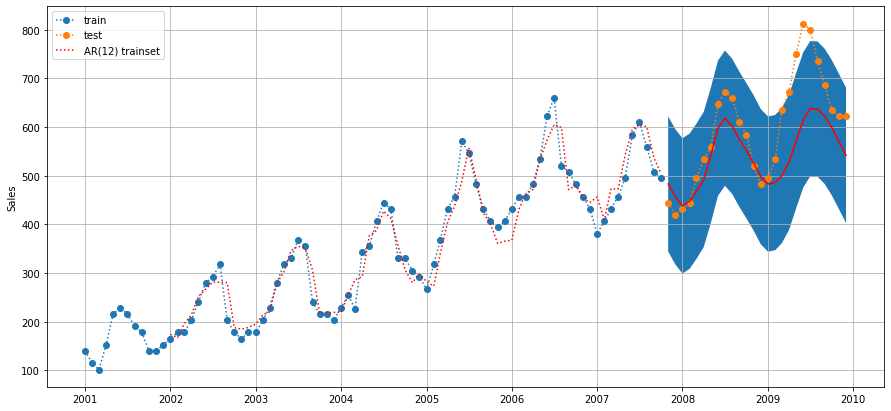

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_train3["Years"],df_train3["Sales"],"o:")
plt.plot(df_test3["Years"],df_test3["Sales"],"o:")
#plt.plot(fitted_values_ar,"g-")
#prediction du modèle
plt.plot(fitted_values_ar,"r:")
plt.plot(prediction_test,"r-")
#Intervalle de confiance 
plt.fill_between(df_test3["Years"], prediction_test.values + interval_ar, prediction_test.values - interval_ar)
plt.legend(["train","test","AR(12) trainset"])
plt.ylabel("Sales")
plt.grid()
plt.show